In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('star_type_data.csv')

In [5]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [7]:
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [8]:
df.shape

(240, 7)

In [10]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [17]:
df['Star type'].nunique()

6

In [18]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

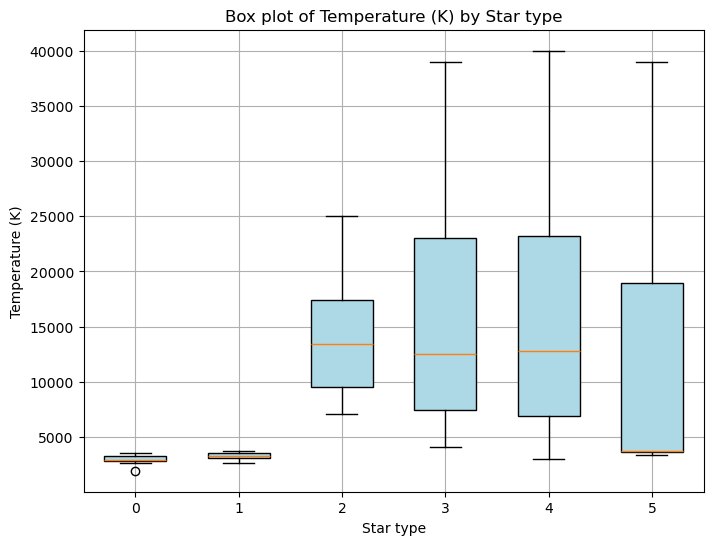

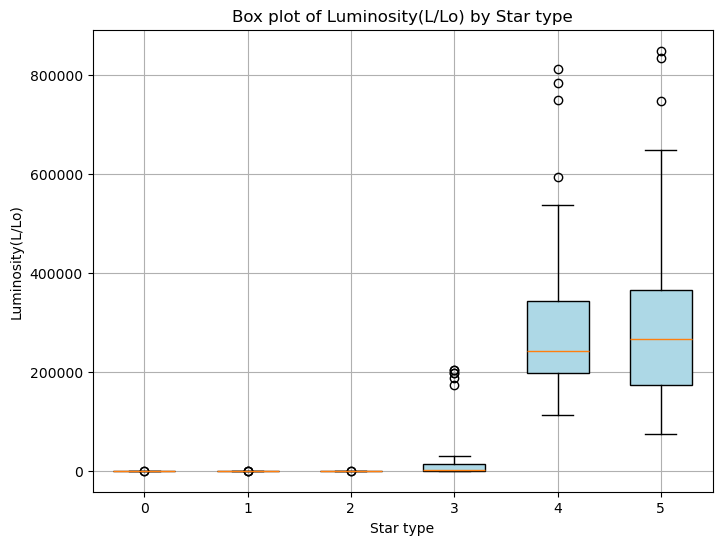

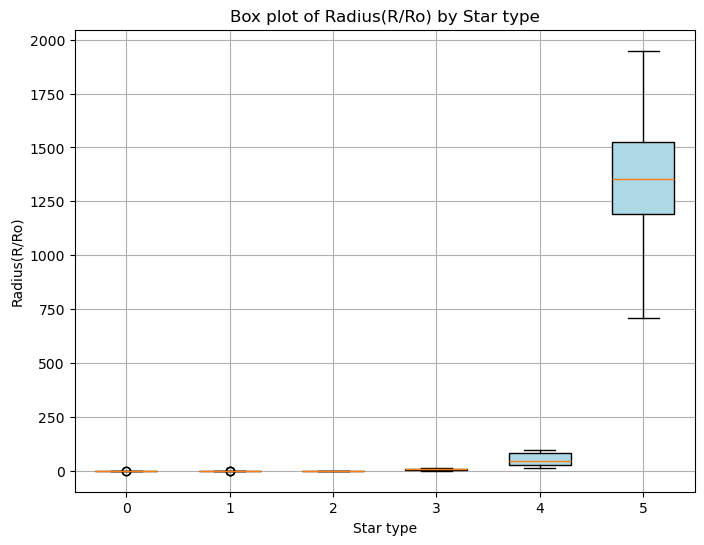

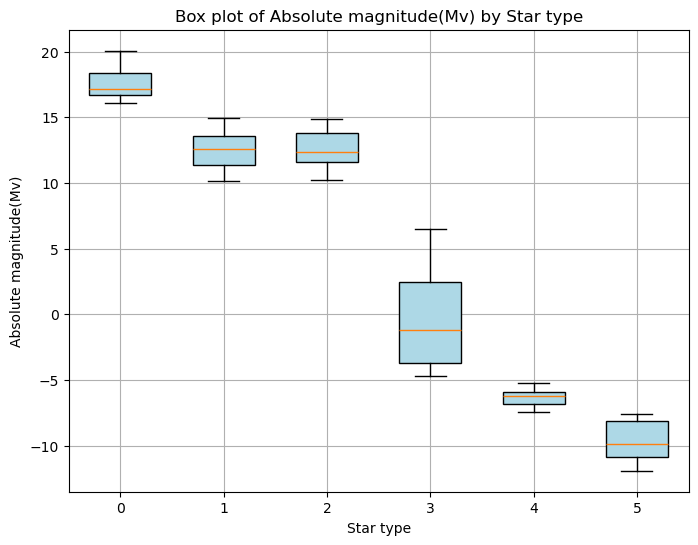

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

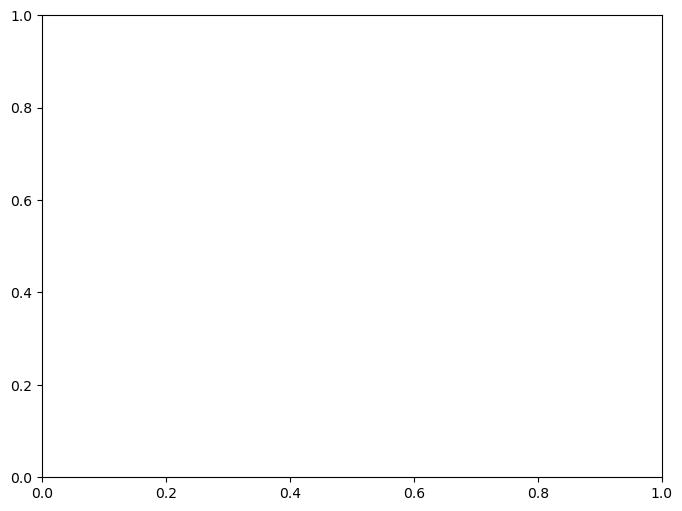

In [21]:
col = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)','Star color', 'Spectral Class']

for column in col:
    plt.figure(figsize=(8, 6))
    for star_type in df['Star type'].unique():
        plt.boxplot(df[df['Star type'] == star_type][column], positions=[star_type], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.xlabel('Star type')
    plt.ylabel(column)
    plt.title(f'Box plot of {column} by Star type')
    plt.xticks(ticks=df['Star type'].unique())
    plt.grid(True)
    plt.show()

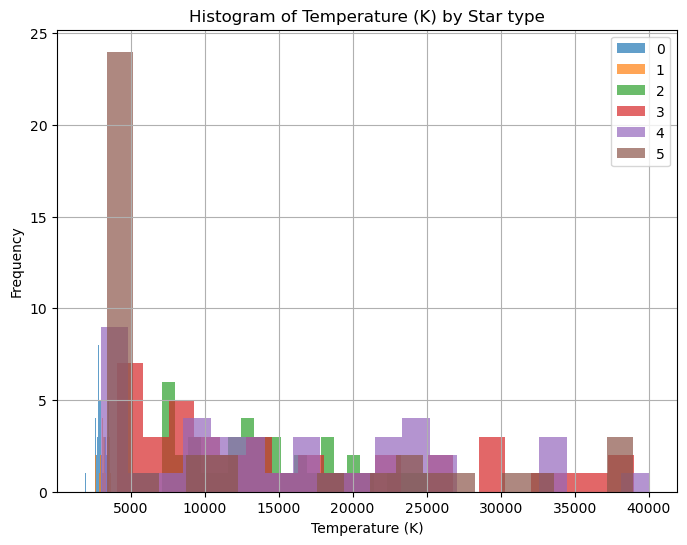

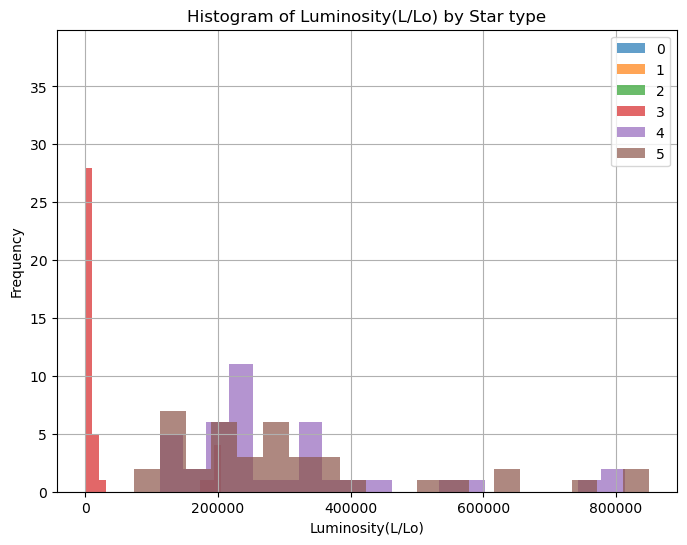

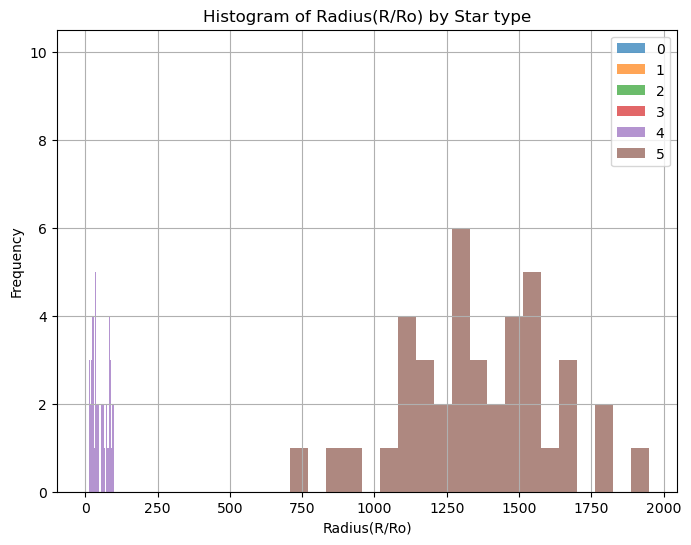

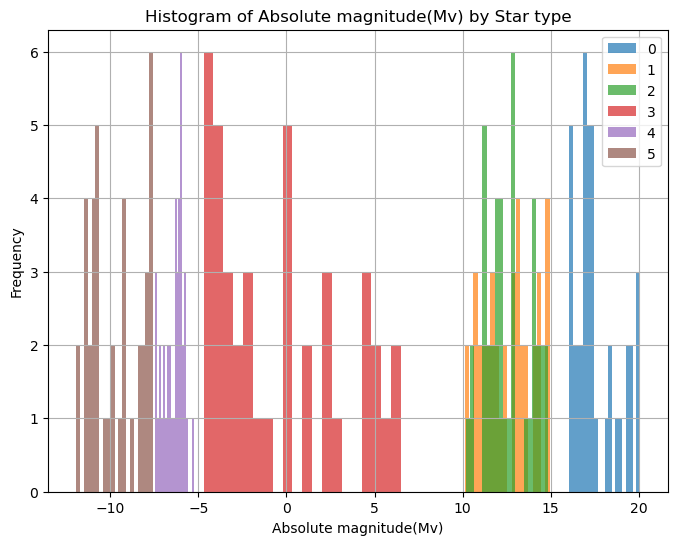

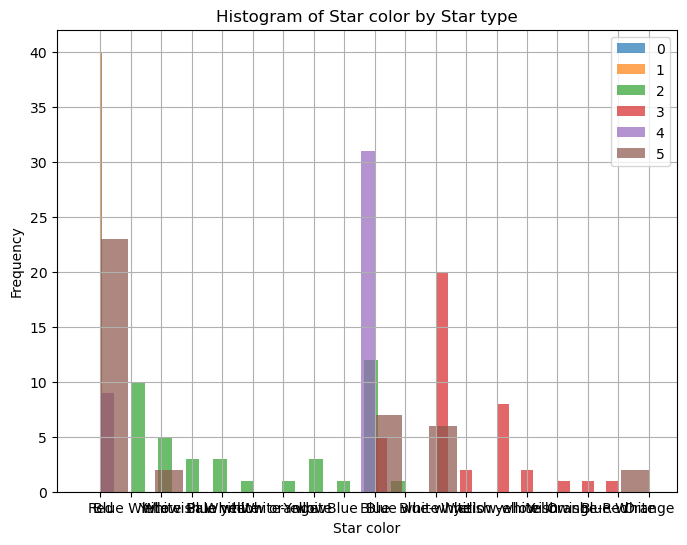

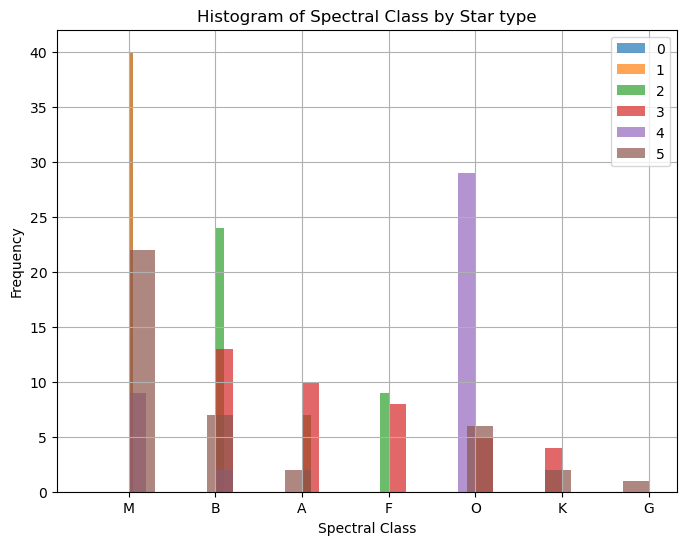

In [20]:
for column in col:
    plt.figure(figsize=(8, 6))
    for star_type in df['Star type'].unique():
        plt.hist(df[df['Star type'] == star_type][column], bins=20, alpha=0.7, label=star_type)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} by Star type')
    plt.legend()
    plt.grid(True)
    plt.show()

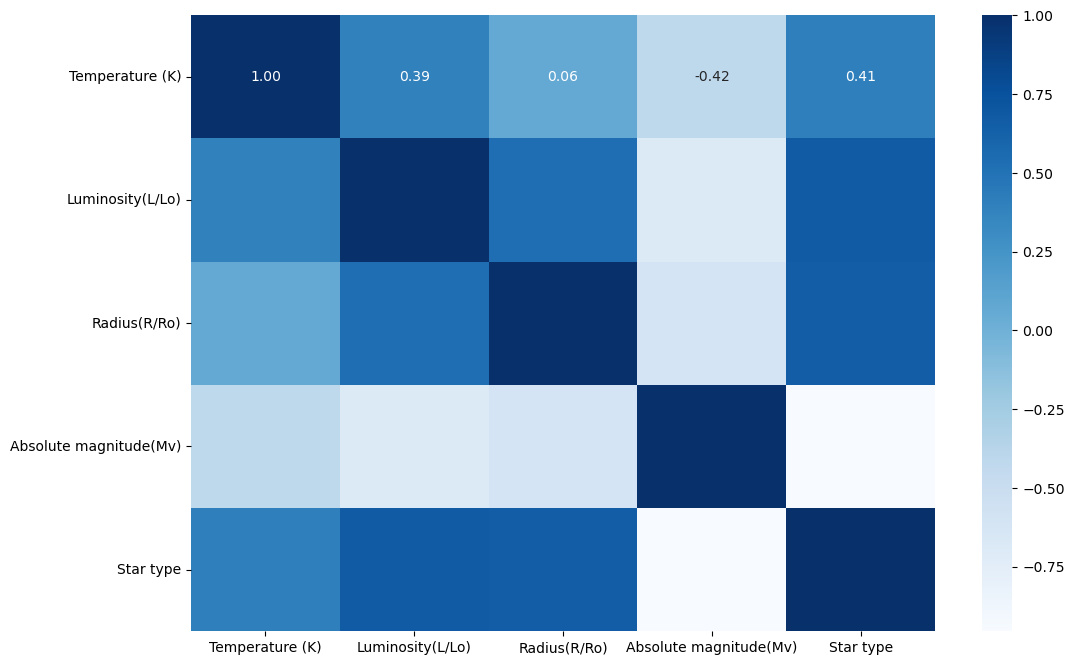

In [30]:
plt.figure(figsize=(12, 8))
sb.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Blues')
plt.show()

C:\Users\406\.conda\envs\st_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\406\.conda\envs\st_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\406\.conda\envs\st_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\406\.conda\envs\st_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\406\.conda\envs\st_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is 

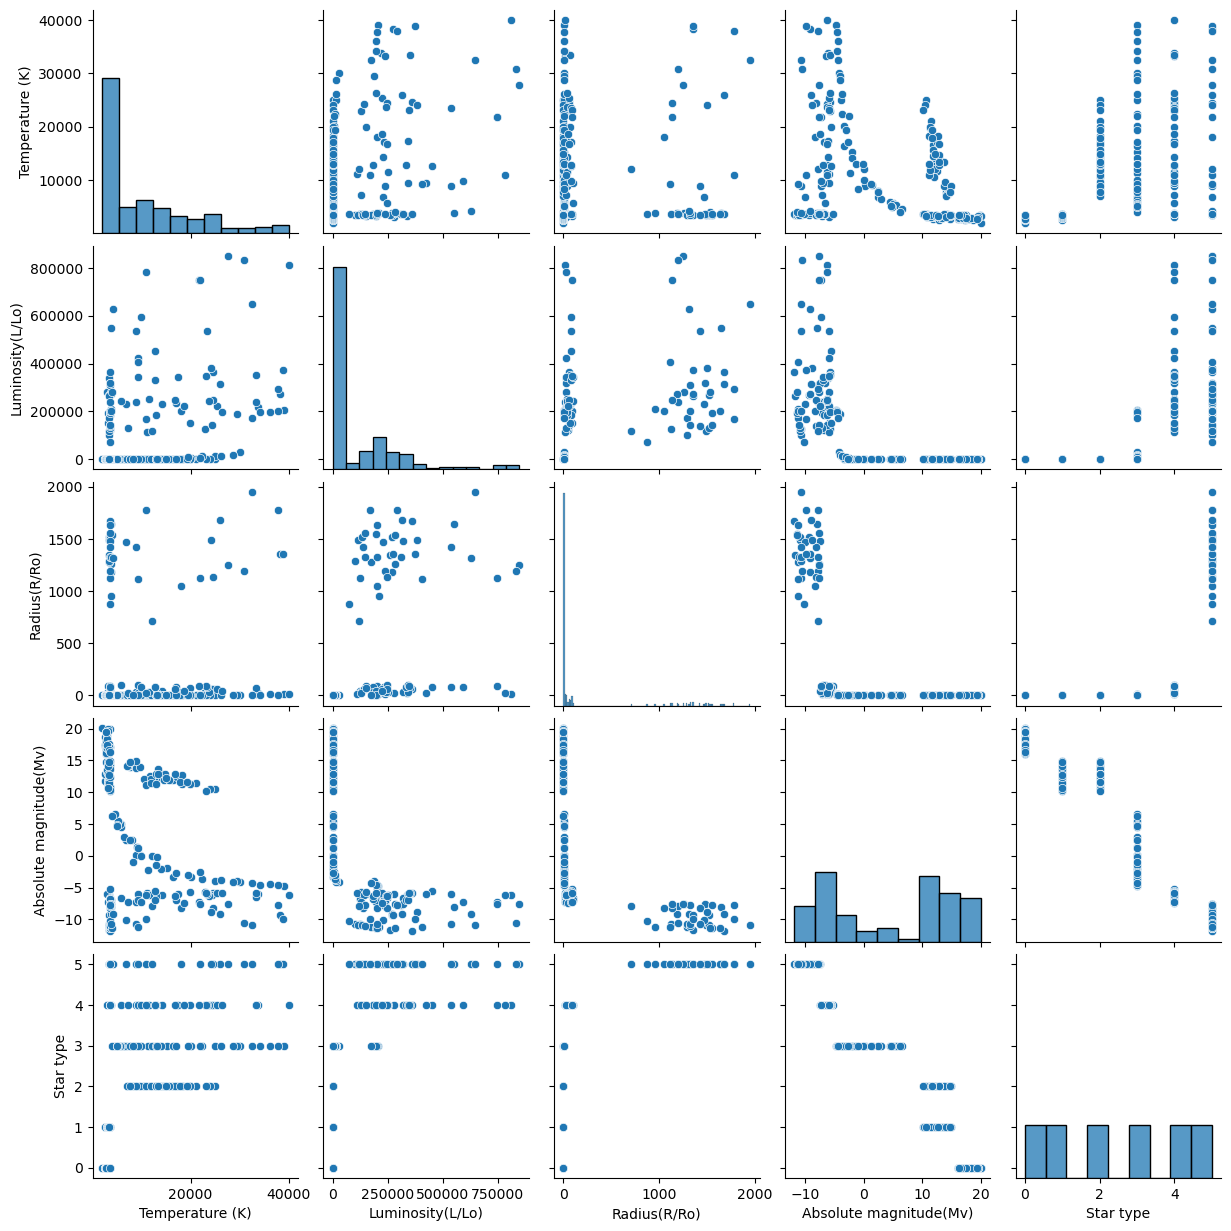

In [32]:
sns.pairplot(df)
plt.show()

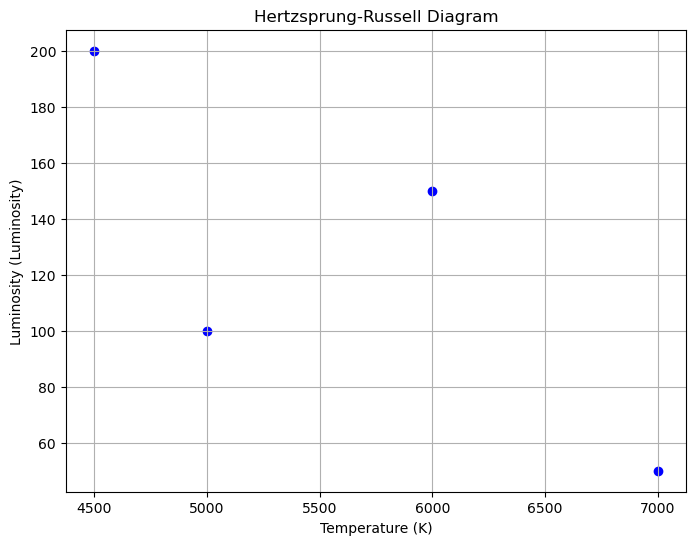

In [112]:
# 데이터 준비 (예시)
temperature = [5000, 4500, 6000, 7000]  # 별의 온도 (K)
luminosity = [100, 200, 150, 50]         # 별의 광도 (Luminosity)

# HR 다이어그램 그리기
plt.figure(figsize=(8, 6))
plt.scatter(temperature, luminosity, color='blue', marker='o')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (Luminosity)')
plt.title('Hertzsprung-Russell Diagram')
plt.grid(True)
plt.show()

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [81]:
one_hot_encoded = one_hot_encoder.fit_transform(df[['Star color']])

In [83]:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Star color']))

In [84]:
df = pd.concat([df, one_hot_encoded_df], axis=1)

In [85]:
df.drop(columns=['Star color'], inplace=True)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = df.drop('Star type', axis=1)

In [92]:
y = df['Star type']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [94]:
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Spectral Class,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,M,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3042,0.000500,0.1542,16.60,M,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2600,0.000300,0.1020,18.70,M,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2800,0.000200,0.1600,16.65,M,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1939,0.000138,0.1030,20.06,M,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,O,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,30839,834042.000000,1194.0000,-10.63,O,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,8829,537493.000000,1423.0000,-10.73,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [96]:
X_train['Spectral Class'] = X_train['Spectral Class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})

In [97]:
X_test['Spectral Class'] = X_test['Spectral Class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
regressor = LogisticRegression(random_state= 42, max_iter= 4000, C= 1, penalty= 'l2', tol= 0.01, solver= 'lbfgs')

In [100]:
regressor.fit(X_train, y_train)

C:\Users\406\.conda\envs\st_310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1, max_iter=4000, random_state=42, tol=0.01)

In [101]:
y_pred = regressor.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
accuracy_score(y_test, y_pred)

0.9583333333333334

In [107]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0,  0,  0,  0],
       [ 1, 11,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  1,  8,  1,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0, 15]], dtype=int64)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10
           3       1.00      0.80      0.89        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.96        72
   macro avg       0.96      0.95      0.95        72
weighted avg       0.96      0.96      0.96        72



In [110]:
y_pred_train = regressor.predict(X_train)

In [111]:
accuracy_score(y_train, y_pred_train)

0.9880952380952381

In [113]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Spectral Class,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,...,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,0,M,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3042,0.000500,0.1542,16.60,0,M,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2600,0.000300,0.1020,18.70,0,M,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2800,0.000200,0.1600,16.65,0,M,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1939,0.000138,0.1030,20.06,0,M,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,O,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,30839,834042.000000,1194.0000,-10.63,5,O,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,8829,537493.000000,1423.0000,-10.73,5,A,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,A,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
